<a href="https://colab.research.google.com/github/VanTrung3007/AI/blob/main/ConLacNguoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5dec70d41f35e402a542c910cc480fac4f21aeadb51ce23323a54f01313e4860
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


55.95225280535148


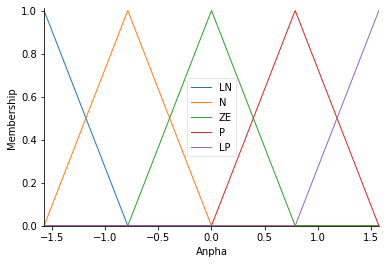

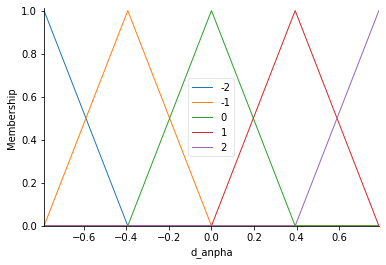

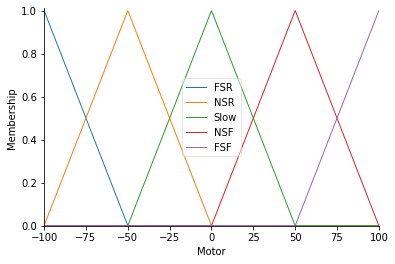

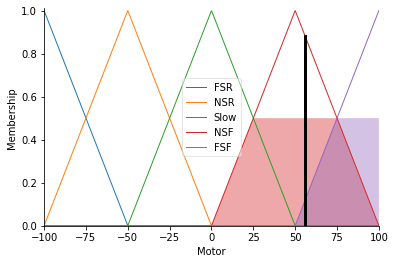

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

universea = np.linspace(-np.pi/2,np.pi/2,61)
universeda = np.linspace(-np.pi/4,np.pi/4,61)
universe1 = np.linspace(-100,100,1000)
#Input
a=ctrl.Antecedent(universea,'Anpha')
da=ctrl.Antecedent(universeda,'d_anpha')
#Output
M=ctrl.Consequent(universe1,'Motor')

namea=['LN','N','ZE','P','LP']
nameda=['-2','-1','0','1','2']
namesT=['FSR','NSR','Slow','NSF','FSF']

a.automf(names=namea)
da.automf(names=nameda)
M.automf(names=namesT)

a.view()
da.view()
M.view()

rule = []

rule.append(ctrl.Rule(antecedent=((a['LN'] & da['-2'])|(a['LN'] & da['-1'])|(a['LN'] & da['0'])|
                                  (a['N'] & da['-2'])),consequent=M['FSR'],label='rule FSR'))
rule.append(ctrl.Rule(antecedent=((a['ZE'] & da['-2'])|(a['N'] & da['-1'])|(a['ZE'] & da['-1'])|
                                  (a['N'] & da['0'])|(a['LN'] & da['1'])|(a['LN'] & da['2'])),consequent=M['NSR'],label='rule NSR'))
rule.append(ctrl.Rule(antecedent=((a['P'] & da['-2'])|(a['P'] & da['-1'])|(a['ZE'] & da['0'])|
                                  (a['N'] & da['1'])|(a['N'] & da['2'])),consequent=M['Slow'],label='rule Slow'))
rule.append(ctrl.Rule(antecedent=((a['LP'] & da['-2'])|(a['LP'] & da['-1'])|(a['P'] & da['0'])|
                                  (a['P'] & da['1'])|(a['ZE'] & da['1'])|(a['ZE'] & da['2'])),consequent=M['NSF'],label='rule NSF'))
rule.append(ctrl.Rule(antecedent=((a['LP'] & da['0'])|(a['LP'] & da['1'])|(a['LP'] & da['2'])|(a['P'] & da['2'])),consequent=M['FSF'],label='rule FSF'))
#Control system
motor_ctrl = ctrl.ControlSystem(rule)
motor_simulation=ctrl.ControlSystemSimulation(motor_ctrl)
# Compute
motor_simulation.input['Anpha'] = np.pi/8
motor_simulation.input['d_anpha'] = 1

motor_simulation.compute()

print(motor_simulation.output['Motor'])

# power
M.view(sim = motor_simulation)